Установка кнопки проверки PEP8

In [1]:
#conda install -c conda-forge jupyter_contrib_nbextensions

In [2]:
#pip install autopep8

In [3]:
import pandas as pd
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
import random
import seaborn as sns
import matplotlib.pyplot as plt

stud1 = pd.read_csv('stud_math.csv') # загрузим датафрейм
stud = stud1.copy() # создадим копию датафрейма для работы с ней, чтобы не вносить изменения в оригинал
stud.dropna(how = 'all') # удалим строки, в которых отсутствуют все значения

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [4]:
# проанализируем данные столбцов
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

**school** - аббервиатура школы  
**sex** - пол ученика (F - жен., М - муж.)  
**age** - возраст ученика (от 15 до 22)  
**address** - тип адреса ученика (U - городской, R - за городом)  
**famsize** - размер семьи (LE3 <= 3, GE3 >3)  
**Pstatus** - статус совместного жилья родителей (T - живут вместе, А - раздельно)  
**Medu** - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
**Fedu** - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
**Mjob** - работа матери (teacher - учитель, health - сфера здравоохранения, services -гос. служба, at_home - не работает, other - другое)  
**Fjob** - работа отца (teacher - учитель, health - сфера здравоохранения, services -гос. служба, at_home - не работает, other - другое)  
**reason** - причина выбора школы (home - близость к дому, reputation - репутация школы, course - образовательная программа, other - другое)  
**guardian** - опекун (mother - мать, father - отец, other - другое)  
**traveltime** - время пути до школы (1 - < 15 мин., 2 - 15-30, 3 - 30- 60, 4 - >60)  
**studytime** - время на учёбу помимо школы в неделю (1 - < 2 часов, 2 - 2-5, 3 - 5-10, 4 - >10)  
**failures** - кол-во внеучебных неудач (n, если 1<=n<=3, иначе 0)  
**schoolsup** - дополнительная образовательная поддержка (yes или no)  
**famsup** - семейная образовательная поддержка (yes или no)  
**paid** - дополнительные платные занятия по математике (yes или no)  
**activities** - дополнительные внеучебные занятия (yes или no)  
**nursery** - посещал детский сад или нет (yes или no)  
**higher** - хочет получить высшее образование (yes или no)  
**internet** - наличие интернета дома (yes или no)  
**romantic** - в романтических отношениях (yes или no)  
**famrel** - семейные отношения (от 1 - очень плохо до 5 - очень хорошо)  
**freetime** - свободное время после школы (от 1 - очень мало до 5 - очень много)  
**goout** - проведение времени с друзьями (от 1 - очень мало до 5 - очень много)  
**health** - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)  
**absences** - количество пропущенных занятий  
**score** - баллы по госэкзамену по математике  

Находим процент отсутствующих значений по колонкам.

In [5]:
((stud.isnull() | stud.isna()).sum() * 100 / stud.index.size).round(2)

school                  0.00
sex                     0.00
age                     0.00
address                 4.30
famsize                 6.84
Pstatus                11.39
Medu                    0.76
Fedu                    6.08
Mjob                    4.81
Fjob                    9.11
reason                  4.30
guardian                7.85
traveltime              7.09
studytime               1.77
failures                5.57
schoolsup               2.28
famsup                  9.87
paid                   10.13
activities              3.54
nursery                 4.05
studytime, granular     1.77
higher                  5.06
internet                8.61
romantic                7.85
famrel                  6.84
freetime                2.78
goout                   2.03
health                  3.80
absences                3.04
score                   1.52
dtype: float64

Удалим строки, в которых отсутствует больше 90% данных и строки, в которых отсутствуют данные об успеваемости по математике.

In [6]:
e = len(stud) # количество строк до удаления
pcr = 90 # процент отсутствующих значений
q = round((len(stud.columns) * (pcr / 100)), 0)
stud.dropna(thresh = q, inplace = True) # удаление строк с 90% отсутствующих значений
stud.dropna(subset = ['score'], inplace = True) # удаление строк с отсутствующими значениями колонки score
e1 = len(stud) # количество строк после удаления
r = round((100 - ((e1 / e) * 100)), 2) # процент удалённых значений
print(f'Было исключено {e - e1} ~ {r}% значений.')
stud.info()

Было исключено 28 ~ 7.09% значений.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               367 non-null    object 
 1   sex                  367 non-null    object 
 2   age                  367 non-null    int64  
 3   address              354 non-null    object 
 4   famsize              345 non-null    object 
 5   Pstatus              331 non-null    object 
 6   Medu                 365 non-null    float64
 7   Fedu                 347 non-null    float64
 8   Mjob                 351 non-null    object 
 9   Fjob                 340 non-null    object 
 10  reason               352 non-null    object 
 11  guardian             337 non-null    object 
 12  traveltime           346 non-null    float64
 13  studytime            365 non-null    float64
 14  failures             350 non-null    float64
 15  scho

In [7]:
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,367.000000,365.000000,347.000000,346.000000,365.000000,350.000000,365.000000,344.000000,360.000000,360.000000,354.000000,358.000000,367.000000
mean,16.678474,2.758904,2.645533,1.436416,2.057534,0.325714,-6.172603,3.909884,3.222222,3.091667,3.511299,7.335196,52.329700
std,1.271869,1.100429,2.291856,0.695953,0.851295,0.735643,2.553884,0.935541,0.979202,1.114572,1.396530,24.199786,22.947618
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,4.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Т.к. в описании колонки studytime максимальное число в ячейке может быть чило 4, а в колонке studytime, granular содержатся отрицательные числа - максимальное из них  
-3 и минимальное -12 - мы не знаем, что отражает данная колонка. Соответственно исключаем её.

In [8]:
stud.drop(['studytime, granular'], inplace = True, axis = 1) # исключаем колонку studytime, granular

Т.к. все колонки содержат данные об условиях жизни, которые могут оказать влияние на успеваемость по математике, и,  
судя по малому проценту отсутствующих значений (максимальный в колонке Pstatus равен 11.39),  
напишем функцию замены данных на наиболее часто встречающиеся в каждой колонке и другие вспомогательные функции.

In [9]:
# составим функцию для вывода начальных данных
def test(df, colx):
    # где df - фрейм данных, colx - название анализируемой колонки
    dfx = df[colx]
    a1 = pd.DataFrame(dfx.value_counts()) # создание таблицы с данными по столбцу
    a1['percent'] = round((a1[colx] * 100 / len(df)), 2) # создание таблицы с процентным соотношением данных по столбцу
    b1 = round((len(df) - a1[colx].sum()), 2) # вычисляем количество незаполненных данных
    c1 = round((100 - a1.percent.sum()), 2) # вычисляем процент незаполненных данных
    display(a1), print(f'Количество незаполненных значений: {b1} ~ {c1}%.'), df.loc[:, [colx]].info()
    if dfx.dtypes != 'O': # если столбец числовой, строим гистограмму распределения
        dfx.hist()
# составим функцию для обработки данных
def objekt(df, colx): # функция для замены отсутствующих значений на наиболее часто встречающиеся или,
    # при небольшой разнице в количестве значений, на любое из двух наиболее часто встречающихся.
    # где df - фрейм данных, colx - название анализируемой колонки
    dfx = df[colx]
    a = pd.DataFrame(dfx.value_counts())
    a['percent'] = round((a[colx] * 100 / len(df)), 2)
    u = a.percent.values[0] - a.percent.values[1]
    u1 = [a.index[0], a.index[1]]
    if dfx.dtypes == 'O' and u > 15:
    # заполнение строковых столбцов: когда строковые столбцы имеют пропущенные значения и значения NaN
        dfx.fillna(dfx.mode().values[0], inplace = True)
    elif dfx.dtypes == 'O' and u <= 15:
        dfx.fillna(random.choice(u1), inplace = True)
    # заполнение числовых столбцов: когда числовые столбцы имеют пропущенные значения и значения NaN
    elif dfx.dtypes != 'O' and u > 15:
        dfx.fillna(dfx.value_counts().index[0], inplace = True)
    else:
        dfx.fillna(random.choice(u1), inplace = True)
    b = pd.DataFrame(dfx.value_counts()) # создание таблицы с данными по столбцу
    b['percent'] = round((b[colx] * 100 / len(df)), 2) # создание таблицы с процентным соотношением данных по столбцу
    return b
def get_boxplot(df, colx, coly, n): # построение графиков сравнения
    # где df - фрейм данных, colx - название анализируемой колонки, coly - название колонки для сравнения, n - выборка
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x = colx, y = coly,
            data = df.loc[df.loc[:, colx].isin(df.loc[:, colx].value_counts().index[:n])],
            ax = ax)
    plt.xticks(rotation = 45)
    ax.set_title('Boxplot for ' + colx)
    plt.show()
def q1(listt): # первый квартиль
    # listt - столбик df или список значений
    q1 = listt.quantile(0.25, interpolation = 'midpoint')
    return q1
def q3(listt): # третий квартиль
     # listt - столбик df или список значений
    q3 = listt.quantile(0.75, interpolation = 'midpoint')
    return q3
def iqr(listt): # межквартильный размах(IQR)
     # listt - столбик df или список значений
    i = q3(listt) - q1(listt)
    return i
def whiskers1(listt): # нижний (мин.) ус
     # listt - столбик df или список значений
    w1 = q1(listt) - 1.5*iqr(listt)
    return w1
def whiskers3(listt): # верхний (макс.) ус
     # listt - столбик df или список значений
    w3 = q3(listt) + 1.5*iqr(listt)
    return w3
def eject1(listt): # нижние выбросы
     # listt - столбик df или список значений
    miin = []
    for x in listt:
        if x <= whiskers1(listt):
            miin.append(x)
    return miin
def eject3(listt): # верхние выбросы
     # listt - столбик df или список значений
    maax = []
    for x in listt:
        if x >= whiskers3(listt):
            maax.append(x)
    return maax
def res_values1(df, colx, coly): # таблица соотношения колонки целевой с нижними выбросами исследуемой
    # где df - фрейм данных, colx - название анализируемой колонки, coly - название колонки для сравнения
    dfx = df[colx]
    a3 = []
    for i in eject1(dfx):
        b3 = df[dfx == i][coly].values[0]
        a3.append(b3)
    u = pd.DataFrame({colx:eject1(dfx),coly:a3})
    return display(u)
def res_values3(df, colx, coly): # таблица соотношения колонки целевой с верхними выбросами исследуемой
    # где df - фрейм данных, colx - название анализируемой колонки, coly - название колонки для сравнения
    dfx = df[colx]
    a3 = []
    for i in eject3(dfx):
        b3 = df[dfx == i][coly].values[0]
        a3.append(b3)
    u = pd.DataFrame({colx:eject3(dfx),coly:a3})
    return display(u)

In [10]:
# изучим данные school (school - аббервиатура школы)
test(stud, 'school')

,school,percent
GP,324,88.28
MS,43,11.72


Количество незаполненных значений: 0 ~ 0.0%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  367 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Все данные в колонке заполнены, данные распределены так, что мы не можем исключить какие- либо строки. Соответственно оставляем её без изменений.

In [11]:
# изучим данные sex (sex - пол ученика (F - жен., М - муж.))
test(stud, 'sex')

,sex,percent
F,196,53.41
M,171,46.59


Количество незаполненных значений: 0 ~ 0.0%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     367 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Все данные в колонке заполнены, данные распределены так, что мы не можем исключить какие- либо строки. Соответственно оставляем её без изменений.

,age,percent
16,98,26.70
17,91,24.80
15,77,20.98
18,76,20.71
19,20,5.45
20,3,0.82
21,1,0.27
22,1,0.27


Количество незаполненных значений: 0 ~ 0.0%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     367 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


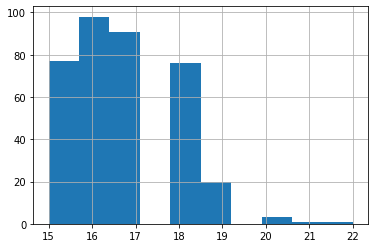

In [12]:
# Изучим данные age (age - возраст ученика (от 15 до 22))
# Столбец age числовой. Построим его распределение.
test(stud, 'age')

У этого признака распределение без аномалий, выбросов нет.  
Все данные в колонке заполнены, данные включают весь необходимый нам интервал 15-22 года. Соответственно оставляем её без изменений.

In [13]:
# изучим данные address (address - тип адреса ученика (U - городской, R - за городом))
test(stud, 'address')

,address,percent
U,276,75.20
R,78,21.25


Количество незаполненных значений: 13 ~ 3.55%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  354 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Не все данные в колонке заполнены, но их меньше 4%, поэтому заполняем отсутствующие значения наиболее часто встречающимся.

In [14]:
objekt(stud, 'address')

,address,percent
U,289,78.75
R,78,21.25


In [15]:
# изучим данные famsize (famsize - размер семьи (LE3 <= 3, GE3 >3))
test(stud, 'famsize')

,famsize,percent
GT3,244,66.49
LE3,101,27.52


Количество незаполненных значений: 22 ~ 5.99%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  345 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Не все данные в колонке заполнены, но их меньше 6%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [16]:
# Заменим None на GT3
objekt(stud, 'famsize')

,famsize,percent
GT3,266,72.48
LE3,101,27.52


In [17]:
# изучим данные Pstatus (Pstatus - статус совместного жилья родителей (T - живут вместе, А - раздельно))
test(stud, 'Pstatus')

,Pstatus,percent
T,297,80.93
A,34,9.26


Количество незаполненных значений: 36 ~ 9.81%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  331 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Т.к. данные распределены так, что их большая часть ~ 80% имеет значение T, заполним отсутствующие значения наиболее часто встречающимся.

In [18]:
objekt(stud, 'Pstatus')

,Pstatus,percent
T,333,90.74
A,34,9.26


,Medu,percent
4.0,123,33.51
2.0,92,25.07
3.0,92,25.07
1.0,55,14.99
0.0,3,0.82


Количество незаполненных значений: 2 ~ 0.54%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


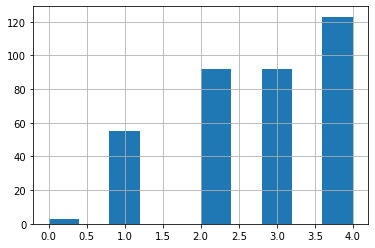

In [19]:
# Изучим данные Medu (Medu - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее))
# Столбец Medu числовой. Построим его распределение.
test(stud, 'Medu')

У этого признака распределение без аномалий, выбросов нет. Не все данные в колонке заполнены, но их меньше 5%,  
поэтому заполняем отсутствующие значения наиболее часто встречающимся.

In [20]:
objekt(stud, 'Medu')

,Medu,percent
4.0,123,33.51
2.0,94,25.61
3.0,92,25.07
1.0,55,14.99
0.0,3,0.82


,Fedu,percent
2.0,95,25.89
3.0,89,24.25
4.0,87,23.71
1.0,73,19.89
0.0,2,0.54
40.0,1,0.27


Количество незаполненных значений: 20 ~ 5.45%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    347 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


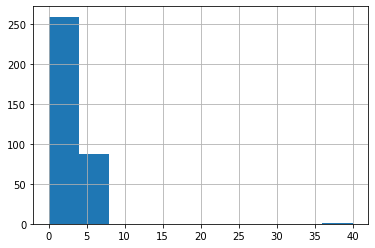

In [21]:
# изучим данные Fedu (Fedu - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее))
# Столбец Fedu числовой. Построим его распределение.
test(stud, 'Fedu')

Колонка содержит один выброс со значением, не указанным в комментарии. Заменим его наиболее часто встречающимся.

In [22]:
stud.Fedu.replace(eject3(stud.Fedu)[0], stud.Fedu.mode().values[0], inplace = True)

Теперь у этого признака распределение без аномалий, выбросов нет. Не все данные в колонке заполнены, но их меньше 7%,  
поэтому заполняем отсутствующие значения наиболее часто встречающимся.

,Fedu,percent
3.0,109,29.70
2.0,96,26.16
4.0,87,23.71
1.0,73,19.89
0.0,2,0.54


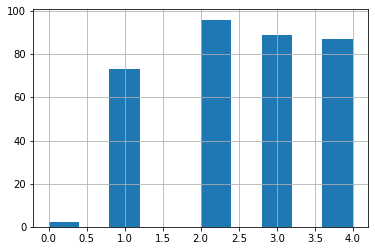

In [23]:
stud.Fedu.hist()
objekt(stud, 'Fedu')

In [24]:
# изучим данные Mjob (Mjob - работа матери (teacher - учитель, health - сфера здравоохранения, services -гос. служба, at_home - не работает, other - другое))
test(stud, 'Mjob')

,Mjob,percent
other,120,32.70
services,92,25.07
at_home,56,15.26
teacher,53,14.44
health,30,8.17


Количество незаполненных значений: 16 ~ 4.36%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    351 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Не все данные в колонке заполнены, но их меньше 5%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [25]:
objekt(stud, 'Mjob')

,Mjob,percent
other,120,32.70
services,108,29.43
at_home,56,15.26
teacher,53,14.44
health,30,8.17


In [26]:
# изучим данные Fjob (Fjob - работа отца (teacher - учитель, health - сфера здравоохранения, services -гос. служба, at_home - не работает, other - другое))
test(stud, 'Fjob')

,Fjob,percent
other,185,50.41
services,96,26.16
teacher,28,7.63
at_home,16,4.36
health,15,4.09


Количество незаполненных значений: 27 ~ 7.35%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    340 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Не все данные в колонке заполнены, но их меньше 8%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [27]:
objekt(stud, 'Fjob')

,Fjob,percent
other,212,57.77
services,96,26.16
teacher,28,7.63
at_home,16,4.36
health,15,4.09


In [28]:
# изучим данные reason (reason - причина выбора школы (home - близость к дому, reputation - репутация школы, course - образовательная программа, other - другое))
test(stud, 'reason')

,reason,percent
course,131,35.69
reputation,95,25.89
home,95,25.89
other,31,8.45


Количество незаполненных значений: 15 ~ 4.08%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  352 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Не все данные в колонке заполнены, но их меньше 5%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [29]:
objekt(stud, 'reason')

,reason,percent
course,146,39.78
reputation,95,25.89
home,95,25.89
other,31,8.45


In [30]:
# изучим данные guardian (guardian - опекун (mother - мать, father - отец, other - другое))
test(stud, 'guardian')

,guardian,percent
mother,235,64.03
father,79,21.53
other,23,6.27


Количество незаполненных значений: 30 ~ 8.17%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  337 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Не все данные в колонке заполнены, но их меньше 9%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [31]:
objekt(stud, 'guardian')

,guardian,percent
mother,265,72.21
father,79,21.53
other,23,6.27


,traveltime,percent
1.0,229,62.40
2.0,90,24.52
3.0,20,5.45
4.0,7,1.91


Количество незаполненных значений: 21 ~ 5.72%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  346 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


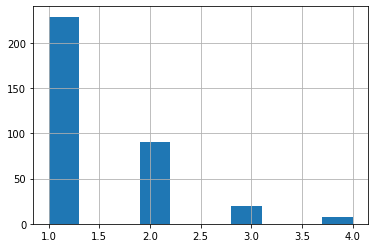

In [32]:
# изучим данные traveltime (traveltime - время пути до школы (1 - < 15 мин., 2 - 15-30, 3 - 30- 60, 4 - >60))
# Столбец traveltime числовой. Построим его распределение.
test(stud, 'traveltime')

У этого признака распределение без аномалий, выбросов нет. Заполняем отсутствующие значения наиболее часто встречающимся.

In [33]:
objekt(stud, 'traveltime')

,traveltime,percent
1.0,250,68.12
2.0,90,24.52
3.0,20,5.45
4.0,7,1.91


,studytime,percent
2.0,181,49.32
1.0,95,25.89
3.0,62,16.89
4.0,27,7.36


Количество незаполненных значений: 2 ~ 0.54%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


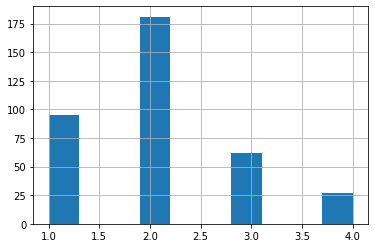

In [34]:
# изучим данные studytime (studytime - время на учёбу помимо школы в неделю (1 - < 2 часов, 2 - 2-5, 3 - 5-10, 4 - >10))
# Столбец studytime числовой. Построим его распределение.
test(stud, 'studytime')

У этого признака распределение без аномалий, выбросов нет. Заполняем отсутствующие значения наиболее часто встречающимся.

In [35]:
objekt(stud, 'studytime')

,studytime,percent
2.0,183,49.86
1.0,95,25.89
3.0,62,16.89
4.0,27,7.36


,failures,percent
0.0,278,75.75
1.0,44,11.99
2.0,14,3.81
3.0,14,3.81


Количество незаполненных значений: 17 ~ 4.64%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  350 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


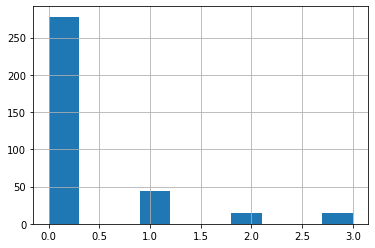

In [36]:
# изучим данные failures (failures - кол-во внеучебных неудач (n, если 1<=n<=3, иначе 0))
# Столбец failures числовой. Построим его распределение.
test(stud, 'failures')

У этого признака распределение без аномалий, выбросов нет. Заполняем отсутствующие значения наиболее часто встречающимся.

In [37]:
objekt(stud, 'failures')

,failures,percent
0.0,295,80.38
1.0,44,11.99
2.0,14,3.81
3.0,14,3.81


In [38]:
# изучим данные schoolsup (schoolsup - дополнительная образовательная поддержка (yes или no))
test(stud, 'schoolsup')

,schoolsup,percent
no,314,85.56
yes,44,11.99


Количество незаполненных значений: 9 ~ 2.45%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  358 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Не все данные в колонке заполнены, но их меньше 3%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [39]:
objekt(stud, 'schoolsup')

,schoolsup,percent
no,323,88.01
yes,44,11.99


In [40]:
# изучим данные famsup (famsup - семейная образовательная поддержка (yes или no))
test(stud, 'famsup')

,famsup,percent
yes,211,57.49
no,124,33.79


Количество незаполненных значений: 32 ~ 8.72%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  335 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Не все данные в колонке заполнены, но их меньше 9%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [41]:
objekt(stud, 'famsup')

,famsup,percent
yes,243,66.21
no,124,33.79


In [42]:
# изучим данные paid (paid - дополнительные платные занятия по математике (yes или no))
test(stud, 'paid')

,paid,percent
no,189,51.50
yes,146,39.78


Количество незаполненных значений: 32 ~ 8.72%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    335 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Не все данные в колонке заполнены, но их меньше 9%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [43]:
objekt(stud, 'paid')

,paid,percent
no,221,60.22
yes,146,39.78


In [44]:
# изучим данные activities (activities - дополнительные внеучебные занятия (yes или no))
test(stud, 'activities')

,activities,percent
yes,181,49.32
no,175,47.68


Количество незаполненных значений: 11 ~ 3.0%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  356 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Не все данные в колонке заполнены, но их примерно 3%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [45]:
objekt(stud, 'activities')

,activities,percent
yes,192,52.32
no,175,47.68


In [46]:
# изучим данные nursery (nursery - посещал детский сад или нет (yes или no))
test(stud, 'nursery')

,nursery,percent
yes,280,76.29
no,72,19.62


Количество незаполненных значений: 15 ~ 4.09%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  352 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Не все данные в колонке заполнены, но их меньше 5%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [47]:
objekt(stud, 'nursery')

,nursery,percent
yes,295,80.38
no,72,19.62


In [48]:
# изучим данные higher (higher - хочет получить высшее образование (yes или no))
test(stud, 'higher')

,higher,percent
yes,332,90.46
no,17,4.63


Количество незаполненных значений: 18 ~ 4.91%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  349 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Не все данные в колонке заполнены, но их меньше 5%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [49]:
objekt(stud, 'higher')

,higher,percent
yes,350,95.37
no,17,4.63


In [50]:
# изучим данные internet (internet - наличие интернета дома (yes или no))
test(stud, 'internet')

,internet,percent
yes,282,76.84
no,54,14.71


Количество незаполненных значений: 31 ~ 8.45%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  336 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Не все данные в колонке заполнены, но их меньше 9%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [51]:
objekt(stud, 'internet')

,internet,percent
yes,313,85.29
no,54,14.71


In [52]:
# изучим данные romantic (romantic - в романтических отношениях (yes или no))
test(stud, 'romantic')

,romantic,percent
no,226,61.58
yes,118,32.15


Количество незаполненных значений: 23 ~ 6.27%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  344 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Не все данные в колонке заполнены, но их меньше 7%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [53]:
objekt(stud, 'romantic')

,romantic,percent
no,249,67.85
yes,118,32.15


,famrel,percent
4.0,172,46.87
5.0,88,23.98
3.0,59,16.08
2.0,17,4.63
1.0,7,1.91
-1.0,1,0.27


Количество незаполненных значений: 23 ~ 6.26%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  344 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


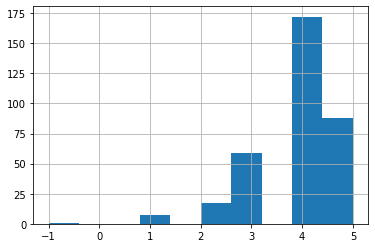

In [54]:
# изучим данные famrel (famrel - семейные отношения (от 1 - очень плохо до 5 - очень хорошо))
# Столбец famrel числовой. Построим его распределение.
test(stud, 'famrel')

Колонка содержит один выброс с неизвестным значением. Заменим его на None.

In [55]:
stud.famrel.replace(eject1(stud.famrel)[0], None, inplace = True)

Теперь у этого признака распределение без аномалий, выбросов нет. Не все данные в колонке заполнены, но их меньше 7%,  
поэтому заполняем отсутствующие значения наиболее часто встречающимся.

In [56]:
objekt(stud, 'famrel')

,famrel,percent
4.0,196,53.41
5.0,88,23.98
3.0,59,16.08
2.0,17,4.63
1.0,7,1.91


,freetime,percent
3.0,145,39.51
4.0,106,28.88
2.0,60,16.35
5.0,33,8.99
1.0,16,4.36


Количество незаполненных значений: 7 ~ 1.91%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  360 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


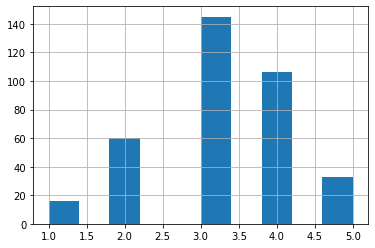

In [57]:
# изучим данные freetime (freetime - свободное время после школы (от 1 - очень мало до 5 - очень много))
# Столбец freetime числовой. Построим его распределение.
test(stud, 'freetime')

Не все данные в колонке заполнены, но их меньше 2%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [58]:
objekt(stud, 'freetime')

,freetime,percent
3.0,152,41.42
4.0,106,28.88
2.0,60,16.35
5.0,33,8.99
1.0,16,4.36


,goout,percent
3.0,121,32.97
2.0,92,25.07
4.0,77,20.98
5.0,47,12.81
1.0,23,6.27


Количество незаполненных значений: 7 ~ 1.9%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   360 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


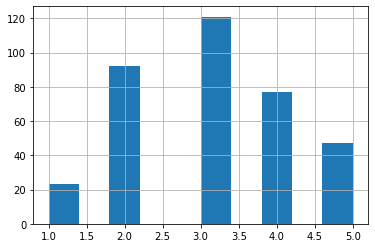

In [59]:
# изучим данные goout (goout - проведение времени с друзьями (от 1 - очень мало до 5 - очень много))
# Столбец goout числовой. Построим его распределение.
test(stud, 'goout')

Не все данные в колонке заполнены, но их меньше 2%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [60]:
objekt(stud, 'goout')

,goout,percent
3.0,128,34.88
2.0,92,25.07
4.0,77,20.98
5.0,47,12.81
1.0,23,6.27


,health,percent
5.0,127,34.60
3.0,86,23.43
4.0,56,15.26
1.0,44,11.99
2.0,41,11.17


Количество незаполненных значений: 13 ~ 3.55%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  354 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


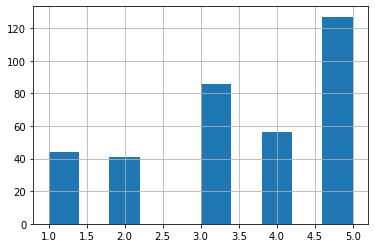

In [61]:
# изучим данные health (health - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо))
# Столбец health числовой. Построим его распределение.
test(stud, 'health')

Не все данные в колонке заполнены, но их меньше 4%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [62]:
objekt(stud, 'health')

,health,percent
5.0,140,38.15
3.0,86,23.43
4.0,56,15.26
1.0,44,11.99
2.0,41,11.17


,absences,percent
0.0,107,29.16
2.0,55,14.99
4.0,49,13.35
6.0,27,7.36
8.0,20,5.45
10.0,16,4.36
12.0,12,3.27
14.0,10,2.72
16.0,7,1.91
3.0,7,1.91


Количество незаполненных значений: 9 ~ 2.5%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  358 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


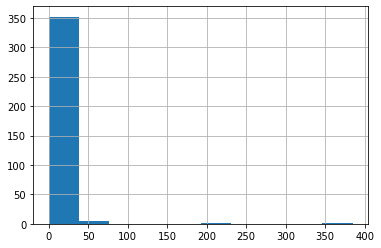

In [63]:
# изучим данные absences (absences - количество пропущенных занятий)
# Столбец absences числовой. Построим его распределение.
test(stud, 'absences')

In [64]:
stud.absences.mean()

7.335195530726257

Колонка содержит много выбросов. Т.к. количество незаполненных значений менее 3%, заменим отсутствующие значения наиболее часто встречающимися.  
Составим boxplot, чтобы узнать плотность распределения данных.

In [65]:
# выбросы колонки absences
eject3(stud.absences)

[25.0,
 54.0,
 26.0,
 20.0,
 56.0,
 24.0,
 28.0,
 22.0,
 385.0,
 20.0,
 21.0,
 75.0,
 22.0,
 20.0,
 38.0,
 20.0,
 40.0,
 23.0,
 212.0]

In [66]:
# соотнесём посещаемость и оценку
res_values3(stud, 'absences', 'score')

,absences,score
0,25.0,55.0
1,54.0,55.0
2,26.0,30.0
3,20.0,40.0
4,56.0,40.0
5,24.0,90.0
6,28.0,45.0
7,22.0,20.0
8,385.0,85.0
9,20.0,40.0


В наборе данных есть учащийся, пропустивший больше всего занятий (385), показал отличные знания по математике (85 баллов), что явлется исключением,  
а не правилом, заменим данные посещаемости на None. Так же поступим и с учащимися, которые пропустили больше 50 занятий.

In [67]:
stud.absences.replace((stud[stud.absences >= 50].absences.tolist()), None, inplace = True)

Заполняем отсутствующие значения наиболее часто встречающимися.

In [68]:
# заменим отсутствующие значения
objekt(stud, 'absences')

,absences,percent
0.0,119,32.43
2.0,56,15.26
4.0,49,13.35
6.0,28,7.63
8.0,20,5.45
10.0,16,4.36
12.0,12,3.27
14.0,10,2.72
16.0,7,1.91
3.0,7,1.91


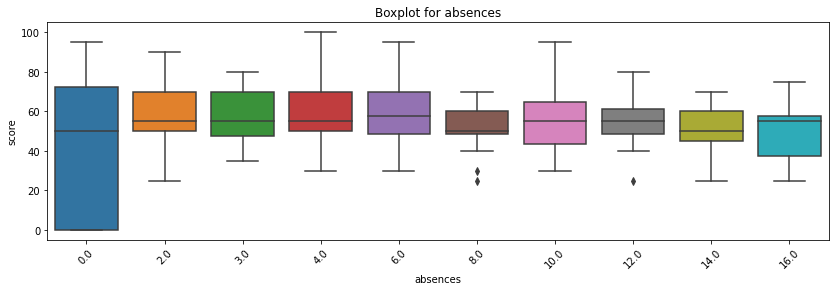

In [69]:
# Составим boxplot, чтобы узнать плотность распределения данных.
get_boxplot(stud, 'absences', 'score', 10)

,score,percent
50.0,50,13.62
55.0,42,11.44
0.0,35,9.54
75.0,31,8.45
60.0,30,8.17
40.0,29,7.90
65.0,28,7.63
45.0,27,7.36
70.0,27,7.36
30.0,15,4.09


Количество незаполненных значений: 0 ~ 0.01%.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   367 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


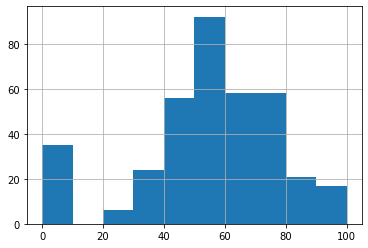

In [70]:
# изучим данные score (score - баллы по госэкзамену по математике)
# Столбец score числовой. Построим его распределение.
test(stud, 'score')

Все данные в колонке заполнены т.к. мы ранее удалили строки, которые не содержали данных в столбце.

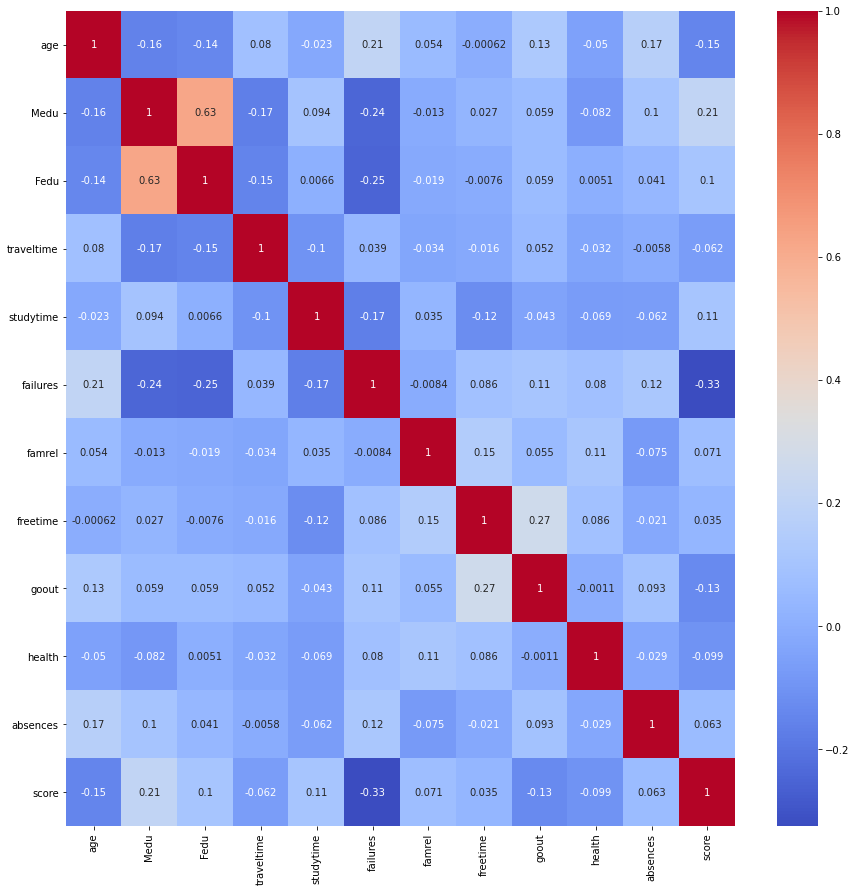

In [71]:
correlation = stud.corr() # вычислим коэффициенты корреляции м/д количественными признаками
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
fig=plt.gcf()
fig.set_size_inches(15,15)

In [72]:
s = stud.corr()
round((abs(s.score)), 2).sort_values(ascending = False)[1:]

failures      0.33
Medu          0.21
age           0.15
goout         0.13
studytime     0.11
Fedu          0.10
health        0.10
famrel        0.07
traveltime    0.06
absences      0.06
freetime      0.04
Name: score, dtype: float64

Согласно таблице, никакой набор данных не оказывает значительного влияния на оценку учащегося. Немного выделяются по влиянию столбцы  
failures, age, Medu (0,33, 0,21, 0,15 корр. соответственно).  
Рассмотрим эти столбцы отдельно:  
***failures*** - немного выделяется значение 0, которое указывает, что количество внеучебных неудач равно 0. Но, я считаю, данные собраны некорректно, т.к.  
при количестве неудач > 3, принимается значение 0.  
***age*** - немного выделяется набор данных с 20- летними учащимися. Но, я считаю, что этого недостаточно для каких либо выводов.  
***Medu*** - немного выделяются данные по матерям без образования и с высшим образованием.  Но, я считаю, что этого недостаточно для каких либо выводов.

Можно посмотреть, различаются ли распределения оценки в зависимости от значения данных столбцов.  
Это можно сделать с помощью box-plot. Так как уникальных значений в некоторых столбцах достаточно много, берем 10 самых частотных.

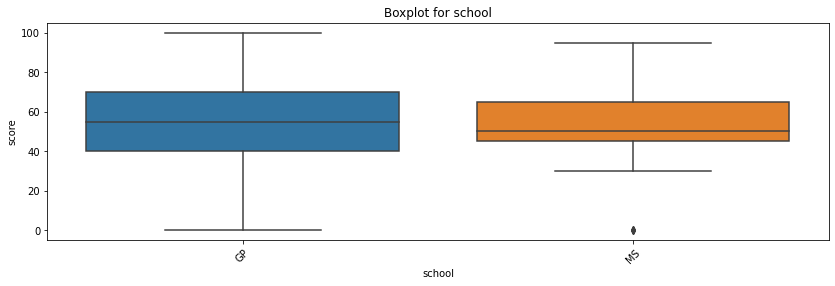

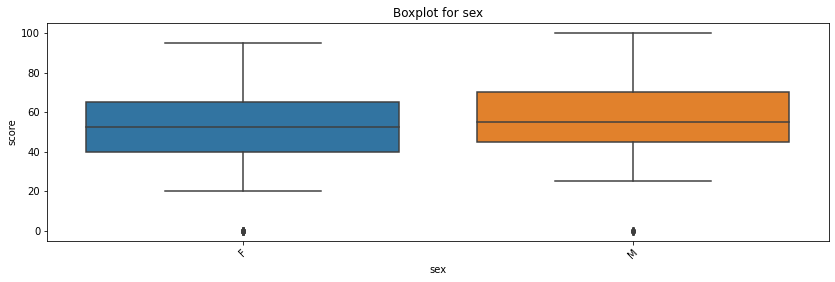

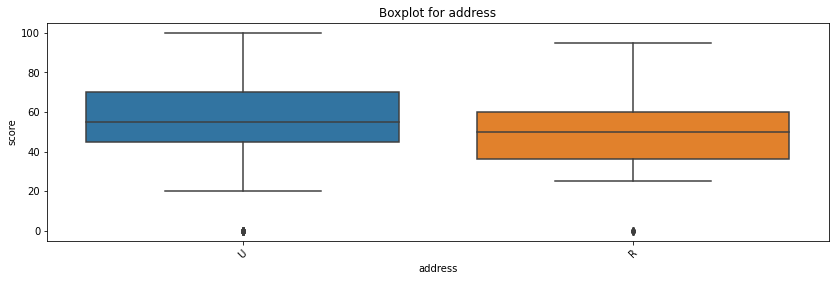

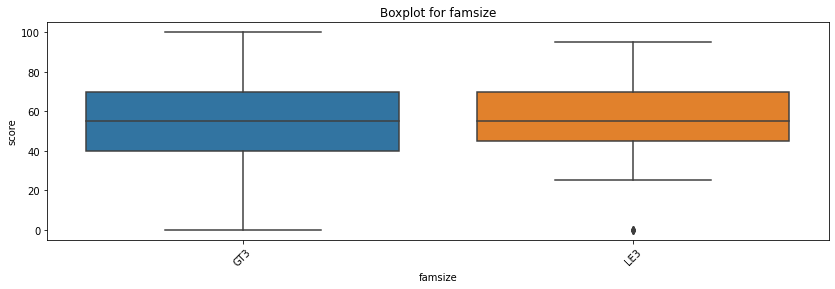

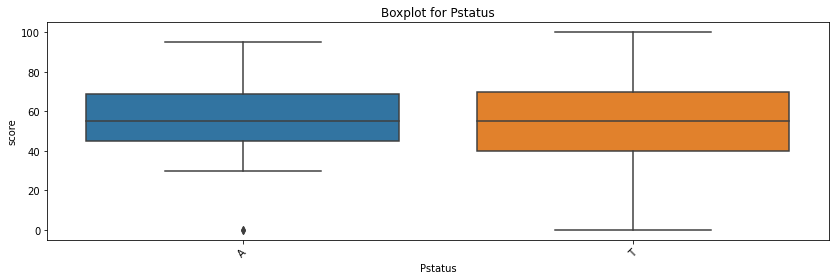

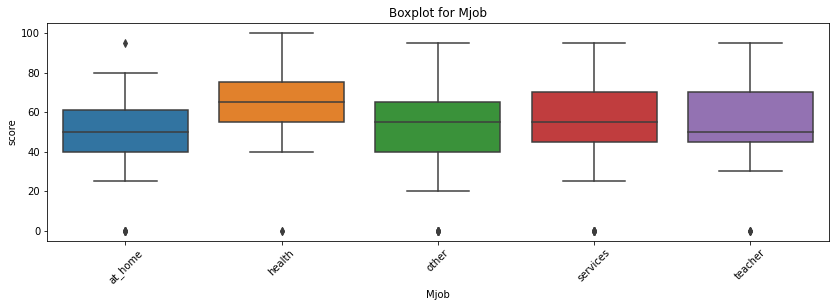

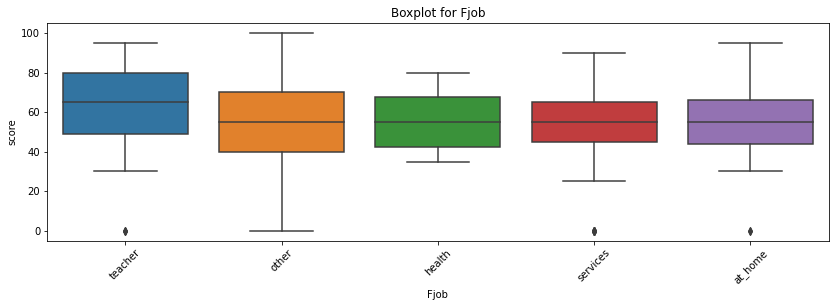

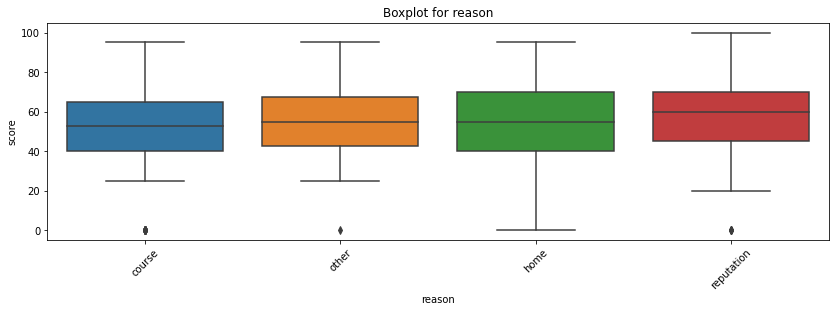

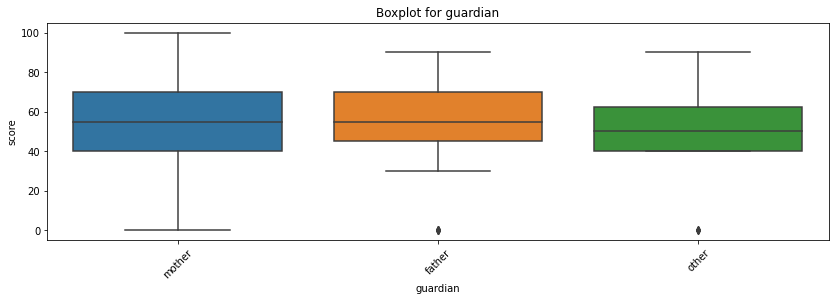

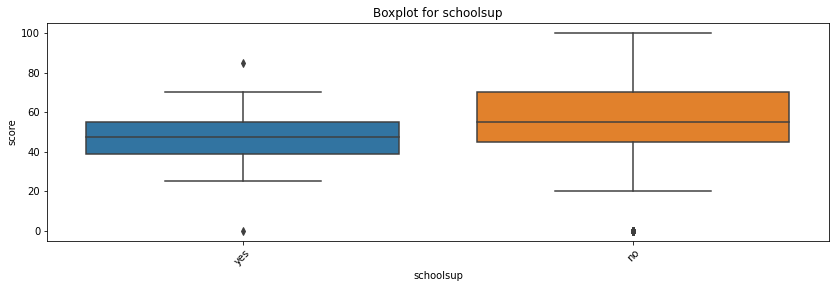

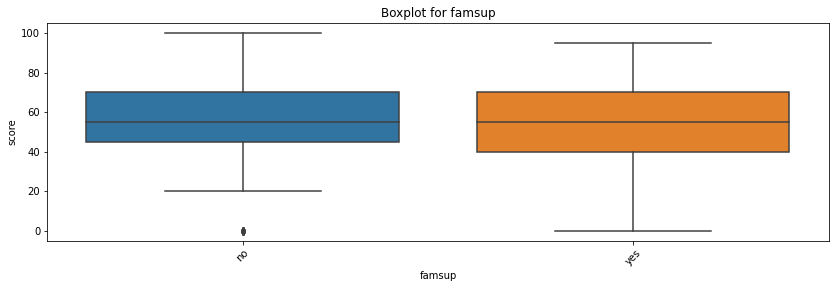

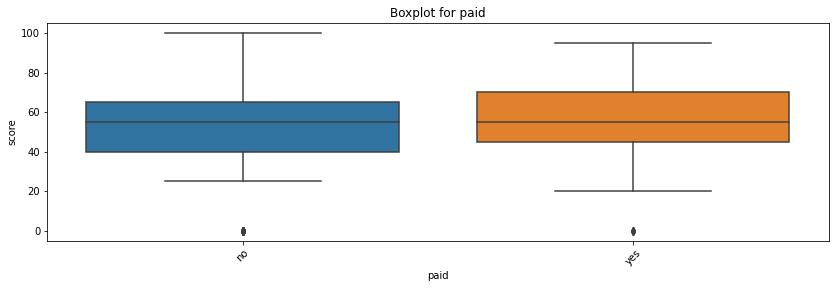

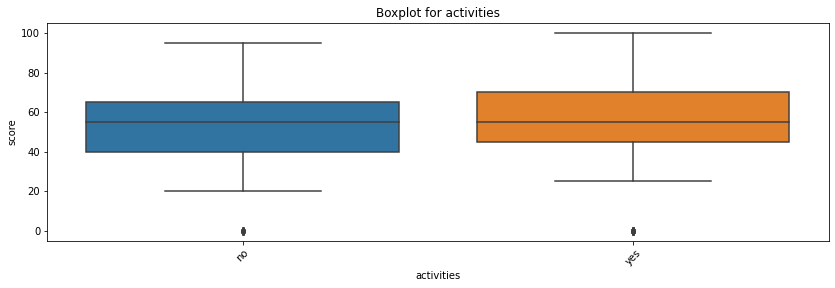

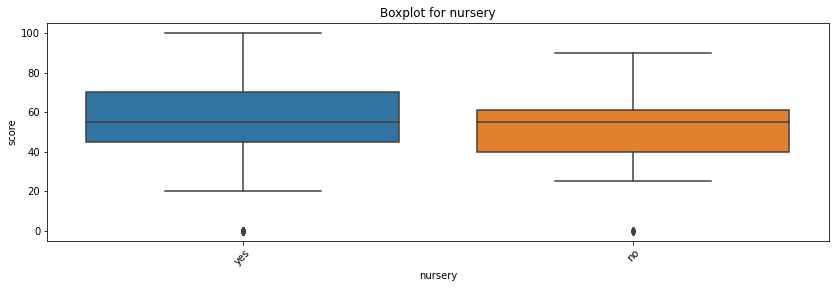

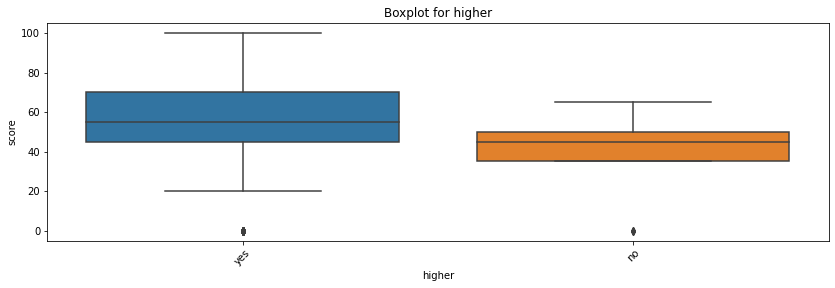

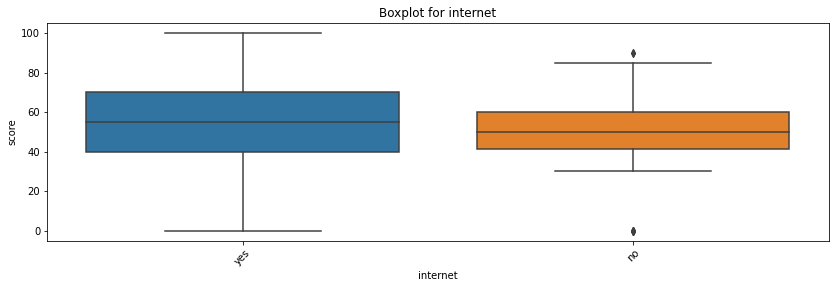

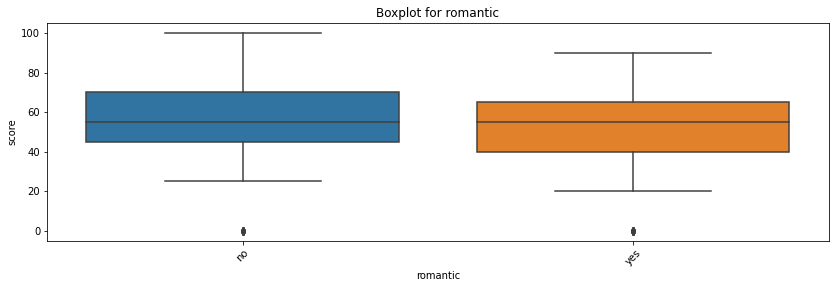

In [73]:
t = stud.select_dtypes(exclude=[np.number]).columns.tolist() # список имен нечисловых столбцов
for col in t:
    get_boxplot(stud, col, 'score', 10)

***Вывод:***
Согласно графикам, никакой набор данных не оказывает значительного влияния на оценку учащегося. Немного выделяются по влиянию столбцы  
Mjob - health, Fjob - teacher, schoolsup - no, nursery - yes, higher - yes, internet - yes, romantic - no.  
Согласно этим данным, лучше учатся те, у кого мать работает в сфере здравоохранения, отец - учитель. Учащийся ходил в дет. сад,  
не ходит на дополнительные занятия в школе, хочет получить высшее образование, имеет доступ к интернету и не состоит в романтических отношениях.  
Но размер выборки и малое влияние перечисленных признаков не дают возможности сделать конкретные выводы по данному набору данных.